## Project Overview: Assessing Aircraft Risk for New Aviation Division

## Business problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## The Data
The data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## Goals
To identify which aircrafts are the lowest risk for the company.

## Technical Presentation.

In [5]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importing the dataset
df = pd.read_csv('AviationData.csv', encoding='latin-1')

C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Data Exploration.

In [7]:
#Explore the first rows
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
#Checking its shape
df.shape


(88889, 31)

In [9]:
#Checking the columns
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
df.info


<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  United

In [11]:
df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  Unit

### Data Cleaning
From the above findings we can see the dataset has some null values. We are going to clean the data inorder to get a better understanding of the data.

In [12]:
#Checking for Null values
df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [13]:
#Drop columns that have more missing values
thershold = len(df) * 0.5
df = df.dropna(thresh=thershold, axis=1)
df.shape

(88889, 25)

In [14]:
#Finding more Null Values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [15]:
#Checking the difference of the remaining values
d={}
for i in df.columns:
    d[i]=len(df[i].unique())
unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= df.isna().sum().values
unique_values

,Column,unique_val,missing_values
0,Event.Id,87951,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Airport.Code,10376,38640
7,Airport.Name,24872,36099
8,Injury.Severity,110,1000
9,Aircraft.damage,5,3194


In [16]:
#Dropping columns with more missing values
subset_col=list(unique_values[unique_values['missing_values']>1000]['Column'])
df.dropna(subset=subset_col, inplace=True)
df.shape

<ipython-input-16-518fa402ec84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=subset_col, inplace=True)


(18700, 25)

In [17]:
df.isnull().sum()

Event.Id                   0
Investigation.Type         0
Accident.Number            0
Event.Date                 0
Location                   0
Country                   47
Airport.Code               0
Airport.Name               0
Injury.Severity            0
Aircraft.damage            0
Registration.Number        0
Make                       3
Model                     12
Amateur.Built              0
Number.of.Engines          0
Engine.Type                0
Purpose.of.flight          0
Total.Fatal.Injuries       0
Total.Serious.Injuries     0
Total.Minor.Injuries       0
Total.Uninjured            0
Weather.Condition          0
Broad.phase.of.flight      0
Report.Status              0
Publication.Date           0
dtype: int64

In [18]:
#Filling in Null values
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [19]:
#Checking for Duplicates
df.duplicated().sum()

0

I have cleaned the data set, there may be some errors but I believe they will not cause an impact on the final findings of the investigation.

## Data Visualisation and Exploratory Data Analysis.
From the above cleaning and exploration we can visualise some findings.

#### Identifying the riskiest Make against Fatal Injuries.


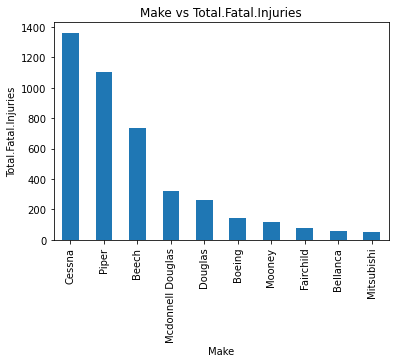

In [20]:
#Visualising Make vs Total.Fatal.Injuries
df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Make vs Total.Fatal.Injuries')
plt.xlabel('Make')
plt.ylabel('Total.Fatal.Injuries')
plt.show()



### Identifying the riskiest Engine type against total fatalities.

<module 'matplotlib.pyplot' from 'C:\\Users\\ACDP-KENYA\\anaconda3\\envs\\learn-env\\lib\\site-packages\\matplotlib\\pyplot.py'>

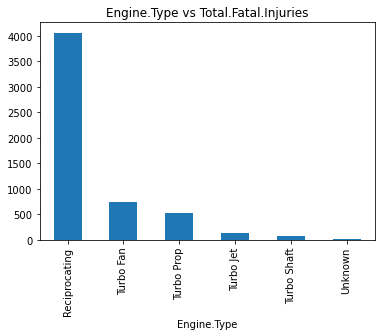

In [21]:
#Visualisation of Engine.Type vs Total.Fatal.Injuries.
df.groupby('Engine.Type')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Engine.Type vs Total.Fatal.Injuries')
plt.xlabel('Engine.Type')
plt

### Identify which purpose of flight had the highest risk.

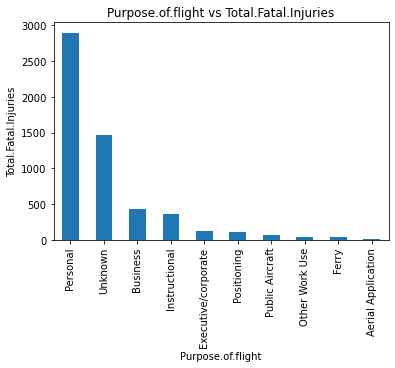

In [22]:
#Visualisation of Purpose.of.flight vs Total.Fatal.Injuries.
df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Purpose.of.flight vs Total.Fatal.Injuries')
plt.xlabel('Purpose.of.flight')
plt.ylabel('Total.Fatal.Injuries')
plt.show()

## Recommendations.

### Aircraft Make
Cesena and Piper are the highest risk aircrafts and should be avoided. Mitsubishi had the lowest fatalities.

### Aircraft Engine
Reciprocating Engine had the highest fatalities and should be avoided. Turbo shaft engines had very low fatalities and should be considered

### Purpose of Flight
Personal perpose of flights had the highest fatalities and carry the highest risk of reason for flight.

## Next Steps.

### Aircraft Make.
In the use of Cesena and piper aircraft heavy maintenance checks should be applied.

### Aircraft Engine.
Turbo Shaft engine should be used in place of reciprocating engines and they should also face strct and high maintenance checks,

### Purpose of flight.
As personal flights carry heavy fatalities, you should ensure that pilots recieve strict training to ensure no fatalities are made.

# Thank you.